In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [151]:
df=pd.read_csv("hudco.csv")
df.head()

,date,population
0,26-02-2022,17
1,21-03-2022,19
2,28-05-2022,16
3,01-07-2022,22
4,02-08-2022,25


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        10 non-null     object
 1   population  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [153]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [154]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-154-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [155]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
 from prophet import Prophet

In [157]:
population=df.groupby('date')['population'].sum().reset_index()

In [158]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [159]:
model=Prophet(interval_width=0.95)

In [160]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/1or0pnep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/zesv4prr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43684', 'data', 'file=/tmp/tmpqki2d_87/1or0pnep.json', 'init=/tmp/tmpqki2d_87/zesv4prr.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelkgjpk9lt/prophet_model-20230421063038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:30:38 - cmdstanpy - INFO - Chain [1] start processing
INF

In [161]:
future_dates=model.make_future_dataframe(periods=30)

In [162]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-07  19.634350   13.951335   25.211573    19.634350    19.634350   
1  2022-02-08  19.684116   14.246240   24.632232    19.684116    19.684116   
2  2022-02-26  19.712110   14.483642   25.087396    19.712110    19.712110   
3  2022-03-21  19.747880   14.370381   24.702478    19.747880    19.747880   
4  2022-05-12  19.828750   14.389196   24.993033    19.828750    19.828750   
5  2022-05-28  19.853634   14.864783   24.819019    19.853634    19.853634   
6  2022-07-11  19.922063   14.658633   25.188797    19.922063    19.922063   
7  2022-10-13  20.068252   14.490010   25.025479    20.068252    20.068252   
8  2023-02-16  20.264207   14.994492   25.423022    20.264207    20.264207   
9  2023-07-03  20.477270   15.385875   26.117572    20.477270    20.477270   
10 2023-07-04  20.478825   15.096375   25.798924    20.478825    20.478825   
11 2023-07-05  20.480380   15.183979   25.598006    20.480380   

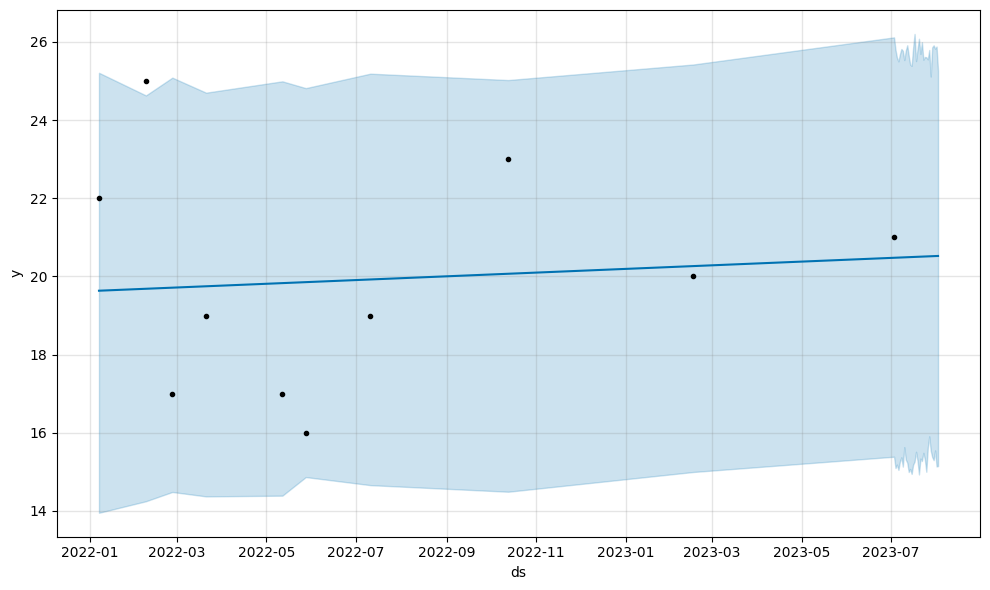

In [163]:
model.plot(forecast)
print(forecast)

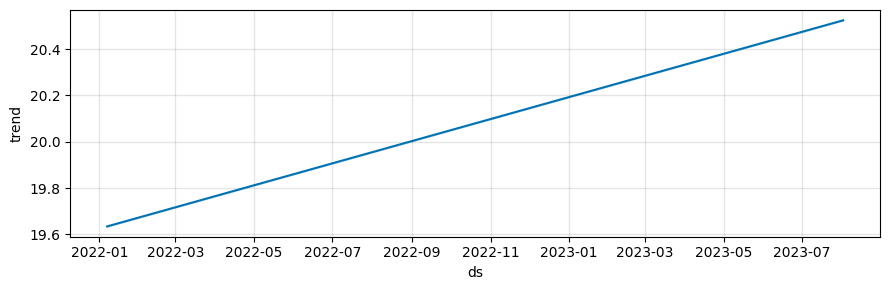

In [164]:
component=model.plot_components(forecast)

In [165]:
 model1=Prophet(interval_width=0.95)

In [166]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/kr844pvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/n7kifqgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56450', 'data', 'file=/tmp/tmpqki2d_87/kr844pvy.json', 'init=/tmp/tmpqki2d_87/n7kifqgk.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model_1nusnf4/prophet_model-20230421063057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:30:57 - cmdstanpy - INFO - Chain [1] start processing
INF

In [167]:
future_dates=model1.make_future_dataframe(periods=10)

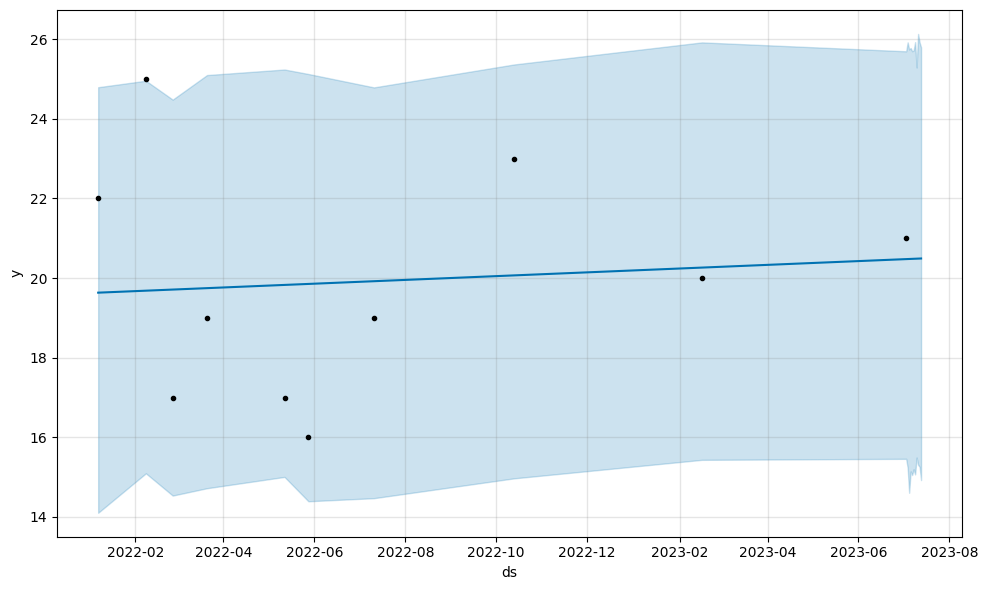

In [168]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-07  19.634350   14.105496   24.794869    19.634350    19.634350   
1  2022-02-08  19.684116   15.096390   24.957875    19.684116    19.684116   
2  2022-02-26  19.712110   14.537143   24.483677    19.712110    19.712110   
3  2022-03-21  19.747880   14.722042   25.099992    19.747880    19.747880   
4  2022-05-12  19.828750   15.006038   25.239545    19.828750    19.828750   
5  2022-05-28  19.853634   14.394361   25.127307    19.853634    19.853634   
6  2022-07-11  19.922063   14.472057   24.790471    19.922063    19.922063   
7  2022-10-13  20.068252   14.970016   25.366401    20.068252    20.068252   
8  2023-02-16  20.264207   15.435051   25.920710    20.264207    20.264207   
9  2023-07-03  20.477270   15.460631   25.697147    20.477270    20.477270   
10 2023-07-04  20.478825   15.236533   25.921841    20.478825    20.478825   
11 2023-07-05  20.480380   14.607481   25.743828    20.480380   

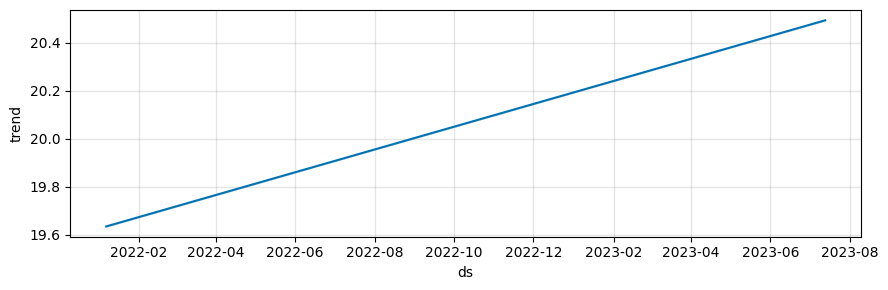

In [169]:
week=model1.plot_components(forecasting)
print(forecasting)